In [15]:
import numpy
import xarray
import cartopy

import matplotlib.pyplot as mp

In [5]:
ncfile = xarray.open_dataset('seasonal_whiplash_PIC_low_to_high.nc')

/Users/baird/anaconda/lib/python3.6/site-packages/xarray/coding/times.py:111: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using dummy netcdftime.datetime objects instead, reason: dates out of range
  result = decode_cf_datetime(example_value, units, calendar)
/Users/baird/anaconda/lib/python3.6/site-packages/xarray/coding/variables.py:66: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using dummy netcdftime.datetime objects instead, reason: dates out of range
  return self.func(self.array[key])


In [13]:
whiplash_pic = ncfile['whiplash_events'].values
lat = ncfile['lat'].values
lon = ncfile['lon'].values

In [8]:
whiplash_pic.shape

(1798, 26, 25)

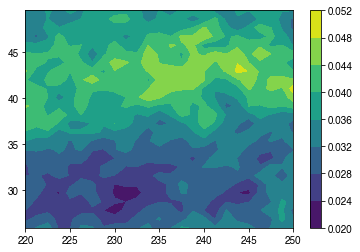

In [14]:
total_events = numpy.sum(whiplash_pic==1, axis=0)
cf=mp.contourf(lon,lat,total_events/1798);mp.colorbar(cf)

In [44]:
mean_val = numpy.mean(total_events/1797)

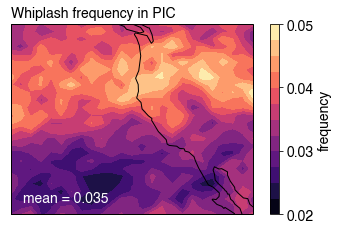

In [56]:
fig, ax = mp.subplots(1,1,subplot_kw={'projection':cartopy.crs.PlateCarree()})
fig.set_size_inches(6,3.5)

ax.set_extent([lon.min(),lon.max(),lat.min(),lat.max()], crs=cartopy.crs.PlateCarree())
ax.coastlines()

contour_plot = ax.contourf(lon,lat,total_events/1797,levels=numpy.arange(0.02,0.051,0.0025),cmap='magma')
cbar = mp.colorbar(contour_plot)
cbar.ax.tick_params(labelsize=14)
cbar.set_label('frequency', fontsize=14)
cbar.set_ticks(numpy.arange(0.02,0.051,0.01))

ax.text(s='Whiplash frequency in PIC', x=0, y=1.02, transform=ax.transAxes, fontsize=14, ha='left', va='bottom')

ax.text(s='mean = '+'{:.03f}'.format(mean_val), x=0.05, y=0.05, ha='left', va='bottom', color='1', transform=ax.transAxes, fontsize=14)

fig.savefig('whiplash_frequency_PIC.png', dpi=600, bbox_inches='tight', transparent=True)

0.03532297418774882